# 2. Data Cleaning
## Clean and Preprocess Market Data

This notebook performs:
- Handle missing values
- Remove outliers
- Align timestamps across datasets
- Handle futures contract rollovers
- Calculate ATM strike dynamically

In [2]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_utils import DataCleaner, DataMerger, load_data, validate_data
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
print("Libraries imported successfully!")

Libraries imported successfully!


## Load Raw Data

In [17]:
# Load data files
spot_df = load_data('../data/nifty_spot_5min.csv')
futures_df = load_data('../data/nifty_futures_5min.csv')
options_df = load_data('../data/nifty_options_5min.csv')

print("Original Data Shapes:")
print(f"Spot: {spot_df.shape}")
print(f"Futures: {futures_df.shape}")
print(f"Options: {options_df.shape}")

INFO:data_utils:Loading data from ../data/nifty_spot_5min.csv
INFO:data_utils:Loading data from ../data/nifty_futures_5min.csv
INFO:data_utils:Loading data from ../data/nifty_options_5min.csv


Original Data Shapes:
Spot: (247, 6)
Futures: (245, 6)
Options: (250, 6)


## 2.1 Check for Missing Values

In [18]:
print("Missing Values Summary:")
print("\nSpot Data:")
print(spot_df.isnull().sum())
print("\nFutures Data:")
print(futures_df.isnull().sum())
print("\nOptions Data:")
print(options_df.isnull().sum())

Missing Values Summary:

Spot Data:
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Futures Data:
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Options Data:
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64


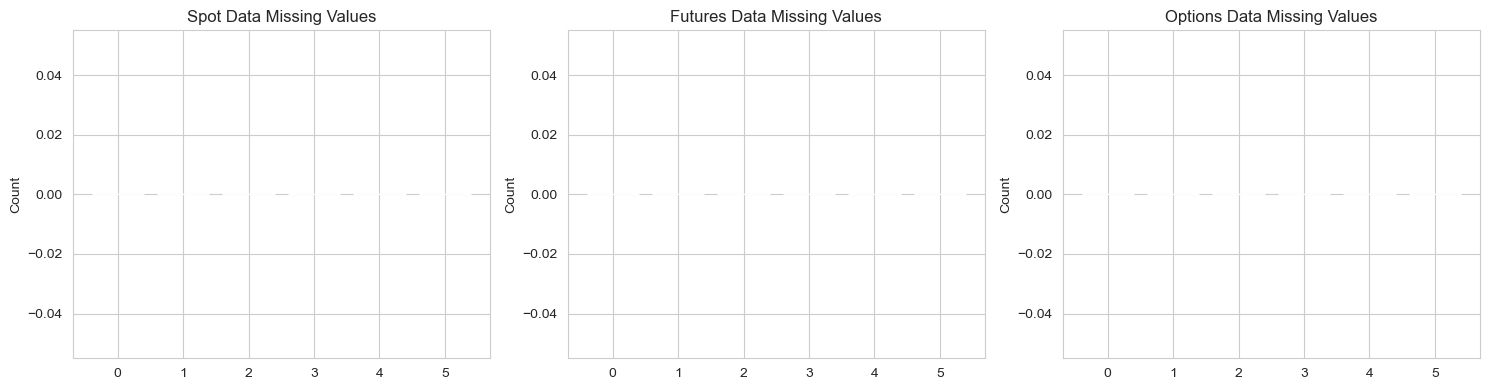

In [19]:
# Visualize missing values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(range(len(spot_df.columns)), spot_df.isnull().sum())
axes[0].set_title('Spot Data Missing Values')
axes[0].set_ylabel('Count')

axes[1].bar(range(len(futures_df.columns)), futures_df.isnull().sum())
axes[1].set_title('Futures Data Missing Values')
axes[1].set_ylabel('Count')

axes[2].bar(range(len(options_df.columns)), options_df.isnull().sum())
axes[2].set_title('Options Data Missing Values')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.savefig('../plots/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.2 Handle Missing Values

In [20]:
# Clean each dataset
cleaner = DataCleaner()

spot_df_clean = cleaner.handle_missing_values(spot_df, method='ffill')
futures_df_clean = cleaner.handle_missing_values(futures_df, method='ffill')
options_df_clean = cleaner.handle_missing_values(options_df, method='ffill')

print("After handling missing values:")
print(f"Spot missing: {spot_df_clean.isnull().sum().sum()}")
print(f"Futures missing: {futures_df_clean.isnull().sum().sum()}")
print(f"Options missing: {options_df_clean.isnull().sum().sum()}")

INFO:data_utils:Handling missing values using method: ffill
INFO:data_utils:Handling missing values using method: ffill
INFO:data_utils:Handling missing values using method: ffill


After handling missing values:
Spot missing: 0
Futures missing: 0
Options missing: 0


## 2.3 Remove Outliers

In [21]:
# Define price columns to check for outliers
price_cols = ['open', 'high', 'low', 'close']

# Remove outliers from spot data
spot_df_clean = cleaner.remove_outliers(
    spot_df_clean, 
    columns=price_cols,
    method='zscore',
    threshold=4.0  # More conservative threshold
)

# Remove outliers from futures data
futures_df_clean = cleaner.remove_outliers(
    futures_df_clean,
    columns=price_cols,
    method='zscore',
    threshold=4.0
)

print(f"\nAfter outlier removal:")
print(f"Spot: {spot_df_clean.shape}")
print(f"Futures: {futures_df_clean.shape}")

INFO:data_utils:Removing outliers using zscore method with threshold 4.0
INFO:data_utils:Removed 0 outlier rows
INFO:data_utils:Removing outliers using zscore method with threshold 4.0
INFO:data_utils:Removed 0 outlier rows



After outlier removal:
Spot: (247, 6)
Futures: (245, 6)


## 2.4 Align Timestamps

In [22]:
# Align timestamps across all datasets
aligned_dfs = cleaner.align_timestamps([spot_df_clean, futures_df_clean, options_df_clean])
spot_df_clean, futures_df_clean, options_df_clean = aligned_dfs

print("After timestamp alignment:")
print(f"Spot: {spot_df_clean.shape}")
print(f"Futures: {futures_df_clean.shape}")
print(f"Options: {options_df_clean.shape}")
print(f"\nAll datasets now have {len(spot_df_clean)} common timestamps")

INFO:data_utils:Aligning timestamps across datasets
INFO:data_utils:Aligned to 245 common timestamps


After timestamp alignment:
Spot: (245, 6)
Futures: (245, 6)
Options: (245, 6)

All datasets now have 245 common timestamps


## 2.5 Handle Futures Contract Rollover

In [23]:
# Handle futures rollover
futures_df_clean = cleaner.handle_futures_rollover(futures_df_clean, rollover_days=5)
print("Futures contract rollover handled")

INFO:data_utils:Handling futures contract rollover


Futures contract rollover handled


## 2.6 Validate Cleaned Data

In [10]:
# Validate data quality
spot_valid = validate_data(spot_df_clean)
futures_valid = validate_data(futures_df_clean)

print(f"\nValidation Results:")
print(f"Spot data valid: {spot_valid}")
print(f"Futures data valid: {futures_valid}")

INFO:data_utils:Data validation passed
INFO:data_utils:Data validation passed



Validation Results:
Spot data valid: True
Futures data valid: True


## 2.7 Save Cleaned Data

In [11]:
# Save cleaned datasets
merger = DataMerger()

merger.save_cleaned_data(spot_df_clean, '../data/nifty_spot_5min_cleaned.csv')
merger.save_cleaned_data(futures_df_clean, '../data/nifty_futures_5min_cleaned.csv')
merger.save_cleaned_data(options_df_clean, '../data/nifty_options_5min_cleaned.csv')

print("Cleaned data saved successfully!")

INFO:data_utils:Saved data to ../data/nifty_spot_5min_cleaned.csv
INFO:data_utils:Saved data to ../data/nifty_futures_5min_cleaned.csv
INFO:data_utils:Saved data to ../data/nifty_options_5min_cleaned.csv


Cleaned data saved successfully!


## 2.8 Generate Cleaning Report

In [12]:
# Generate cleaning report
merger.generate_cleaning_report(
    original_df=spot_df,
    cleaned_df=spot_df_clean,
    filepath='../results/data_cleaning_report.txt'
)

print("Cleaning report generated: results/data_cleaning_report.txt")

INFO:data_utils:Generated cleaning report: ../results/data_cleaning_report.txt


Cleaning report generated: results/data_cleaning_report.txt


In [13]:
# Display report
with open('../results/data_cleaning_report.txt', 'r') as f:
    print(f.read())

DATA CLEANING REPORT

Original dataset rows: 247
Cleaned dataset rows: 245
Rows removed: 2
Removal percentage: 0.81%

MISSING VALUES SUMMARY

Original dataset:
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Cleaned dataset:
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

STATISTICAL SUMMARY

Cleaned dataset statistics:
                           timestamp          open          high  \
count                            245    245.000000    245.000000   
mean   2025-07-19 02:38:41.632653056  24690.970671  24794.293025   
min              2025-01-20 00:00:00  22082.650391  22105.050781   
25%              2025-04-23 00:00:00  24125.550781  24242.599609   
50%              2025-07-18 00:00:00  24888.199219  25012.650391   
75%              2025-10-16 00:00:00  25549.000000  25653.449219   
max              2026-01-16 00:00:00  26328.550781  26373.199219   
std                   

## 2.9 Merge Datasets

In [14]:
# Merge spot, futures, and options data
merged_df = merger.merge_datasets(spot_df_clean, futures_df_clean, options_df_clean)

print(f"Merged dataset shape: {merged_df.shape}")
print("\nFirst few rows:")
merged_df.head()

INFO:data_utils:Merging spot, futures, and options data
INFO:data_utils:Merged dataset has 245 rows


Merged dataset shape: (245, 16)

First few rows:


,timestamp,open_spot,high_spot,low_spot,close_spot,volume_spot,open_futures,high_futures,low_futures,close_futures,volume_futures,open,high,low,close,volume
0,2025-01-20,23344.750000,23391.099609,23170.650391,23290.400391,301500,49350.800781,49650.601562,48683.601562,48834.148438,173100,1761.179077,1775.407887,1741.608239,1770.551605,4333011
1,2025-01-21,23024.650391,23426.300781,22976.849609,23421.650391,312900,48570.898438,49543.148438,48430.949219,49532.000000,134700,1748.941162,1779.001616,1741.511146,1766.763810,7169109
2,2025-01-22,23155.349609,23169.550781,22981.300781,23099.150391,276000,48724.398438,48781.750000,48074.050781,48689.550781,151700,1803.088745,1812.170087,1753.263367,1755.448694,8373913
3,2025-01-23,23205.349609,23270.800781,23090.650391,23128.300781,275600,48589.000000,48892.699219,48493.000000,48770.148438,124600,1811.829956,1825.524764,1799.446439,1804.594144,5907471
4,2025-01-24,23092.199219,23347.300781,23050.000000,23183.900391,264300,48367.800781,48858.648438,48203.000000,48546.050781,139900,1821.542603,1840.433609,1810.664579,1811.878650,4887027


In [15]:
# Save merged data
merger.save_cleaned_data(merged_df, '../data/nifty_merged_5min.csv')
print("\nMerged data saved to data/nifty_merged_5min.csv")

INFO:data_utils:Saved data to ../data/nifty_merged_5min.csv



Merged data saved to data/nifty_merged_5min.csv


## Summary

In [24]:
print("=" * 80)
print("DATA CLEANING SUMMARY")
print("=" * 80)
print(f"\nOriginal spot data: {len(spot_df)} rows")
print(f"Cleaned spot data: {len(spot_df_clean)} rows")
print(f"Data removed: {len(spot_df) - len(spot_df_clean)} rows ({(len(spot_df) - len(spot_df_clean))/len(spot_df)*100:.2f}%)")
print(f"\nFinal merged dataset: {merged_df.shape[0]} rows, {merged_df.shape[1]} columns")
print("\nNext Step: Proceed to 03_feature_engineering.ipynb")

DATA CLEANING SUMMARY

Original spot data: 247 rows
Cleaned spot data: 245 rows
Data removed: 2 rows (0.81%)

Final merged dataset: 245 rows, 16 columns

Next Step: Proceed to 03_feature_engineering.ipynb
